In [30]:
########################### Libraries ####################################
import astropy
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import json
import scipy
from scipy.signal import argrelextrema
import matplotlib.backends.backend_pdf
from gatspy import datasets, periodic
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

In [5]:
df1=pd.read_csv('df1_homogen_zg.csv')
df2=pd.read_csv('df1_homogen_zr.csv')
df3=pd.read_csv('df1_homogen_summ.csv')

In [8]:
# names=df1['Type'].value_counts()[:100].index.tolist()
names=['DCEP','CEP','BCEP','UG','DCEPS','CEP(B)','CEPS','RR']
# pdf = matplotlib.backends.backend_pdf.PdfPages("234.pdf")
for item in names:
    

    data1=df1[df1['Type']==item]['Nobs'].tolist()
    data2=df2[df2['Type']==item]['Nobs'].tolist()
    data3=df3[df3['Type']==item]['Nobs'].tolist()
    
    
    values1, base1 = np.histogram(data1, bins=60)
    values2, base2 = np.histogram(data2, bins=60)
    values3, base3 = np.histogram(data3, bins=60)
    
    
    
    cumulative1 = np.cumsum(values1)
    cumulative2 = np.cumsum(values2)
    cumulative3 = np.cumsum(values3)
    
    f=plt.figure(figsize=(8,5))
#     plt.gca().set_xlim([0,160])
#     ax = plt.gca()
#     ax.set_ylim([0,2500])
    
#     ax.set_facecolor((1.0, 1, 1))
#     plt.plot(base1[:-1], len(data1)-cumulative1, c='green')
#     plt.plot(base2[:-1], len(data2)-cumulative2, c='red')
#     plt.plot(base3[:-1], len(data3)-cumulative3, c='blue',)
#     plt.legend(['ZG','ZR','SUMM'])
#     plt.title(item)
#     plt.grid(True,linestyle="--")

# #     pdf.savefig(f) #saving pdf
#     plt.show()
    
# # pdf.close()


<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

In [29]:
!pip install --upgrade matplotlib --user

  Using cached https://files.pythonhosted.org/packages/b4/4d/8a2c06cb69935bb762738a8b9d5f8ce2a66be5a1410787839b71e146f000/matplotlib-3.2.1-cp37-cp37m-win_amd64.whl


In [ ]:
obj_mjd

In [9]:
# %%time
df=pd.DataFrame(columns=['id','ra','dec','Nobs','filter','Name','mean_magn','amplitude','max_PSD','max_fs','skew','std','trand_angle'],index=range(35000))
obj_mjd=[]
obj_mag=[]
obj_magerr=[]
k=0

        
names=df1[df1['Type']=='DCEP']['Name'].tolist()[:1]
for item in names:
    
    try:
        with open(r"C:\Users\rtut6\Desktop\Backup\res\{}.txt".format(item)) as file:
            res = file.read().replace("'", '"')
            res=json.loads(res)
            obj_mjd=[]
            obj_mag=[]
            obj_magerr=[]
            for obj in res.keys():

                for ii in res[obj]['lc']:
                    obj_mjd.append(ii['mjd'])
                    obj_mag.append(ii['mag'])
                    obj_magerr.append(ii['magerr'])

                Fs = 1/((np.array(obj_mjd).max() - np.array(obj_mjd).min() )/np.array(obj_mjd).size)
                f, Pxx = scipy.signal.periodogram(np.array(obj_mag), fs=Fs)

                df['ra'][k]=round(res[obj]['meta']['coord']['ra'],3)
                df['dec'][k]=res[obj]['meta']['coord']['dec']
                df['Nobs'][k]=res[obj]['meta']['nobs']                     
                df['filter'][k]=res[obj]['meta']['filter']
                df['Name'][k]=item
                df['id'][k] = obj
                df['mean_magn'][k] = np.array(obj_mag).mean()
                df['amplitude'][k] = (np.array(obj_mag).max() - np.array(obj_mag).min())/2
                df['trand_angle'][k] = np.polyfit(np.array(obj_mjd), np.array(obj_mag), 1)[0] 
                df['skew'][k] = scipy.stats.skew(np.array(obj_mag))
                df['std'][k] = np.array(obj_mag).std()
                df['max_PSD'][k] = Pxx.max()
                df['max_fs'][k] = f[Pxx.argmax()]
                k=k+1
                
    except Exception as ex:
        print("file {} has error".format(item[0]), ex)

#         if item[0] % 1000 == 0 :
#             print(111)
    #         my_data.to_csv('backup_' + str(item[0]) + '.csv')

In [10]:
df.head(100)

,id,ra,dec,Nobs,filter,Name,mean_magn,amplitude,max_PSD,max_fs,skew,std,trand_angle
0,686103200001005,296.265,31.3308,98,zg,11423,13.3243,0.5055,3.09661,0.104069,-0.443101,0.304187,-0.000598276
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
model = periodic.LombScargleFast(fit_period=True)
model.optimizer.period_range = (1, 5)
model.fit(obj_mjd, obj_mag, obj_magerr)
model.find_best_periods(n_periods=4,return_scores=True)
# model.periodogram(periods=True)

Finding optimal frequency:
 - Estimated peak width = 0.0272
 - Using 5 steps per peak; omega_step = 0.00545
 - User-specified period range:  1 to 5
 - Computing periods at 924 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
Finding optimal frequency:
 - Estimated peak width = 0.0272
 - Using 5 steps per peak; omega_step = 0.00545
 - User-specified period range:  1 to 5
 - Computing periods at 924 steps
Zooming-in on 8 candidate peaks:
 - Computing periods at 1600 steps


(array([4.28374317, 1.30116181, 4.21423065, 1.31091009]),
 array([0.8072557 , 0.77766658, 0.19914657, 0.18233168]))

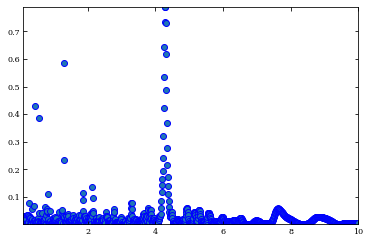

In [36]:
periods = np.linspace(0.1, 10, 1000)
scores = model.score(periods)
for i in range(len(periods)):
    periods[i]=round(periods.tolist()[i],4)
    scores[i]=round(scores.tolist()[i],4)
# plt.plot(periods,scores)

plt.scatter(periods, scores)


In [ ]:
type(scores)

In [48]:
rng = np.random.RandomState(0)
t = 100 * rng.rand(100)
dy = 0.1
omega = 10
y = np.sin(omega * t) + dy * rng.randn(100)
ls = LombScargleFast().fit(t, y, dy)
ls.optimizer.period_range = (0.2, 1.2)
ls.best_period

NameError: name 'LombScargleFast' is not defined